In [120]:
#Import Libraries
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn import svm



In [121]:
#Load Data (Source: Kaggle)
df_train = pd.read_csv("C:\\Users\\Fenia\\Dropbox\\PC\\Desktop\\fraudTrain.csv")
df_test = pd.read_csv("C:\\Users\\Fenia\\Dropbox\\PC\\Desktop\\fraudTest.csv")
df = pd.concat([df_train,df_test])
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [122]:
#Explore the dataset
print('Shape of dataset',df.shape)
print('Informations about data',df.info())

Shape of dataset (1852394, 23)
<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float6

In [123]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [124]:
df.groupby("is_fraud").count()["cc_num"]

is_fraud
0    1842743
1       9651
Name: cc_num, dtype: int64

<Axes: xlabel='is_fraud'>

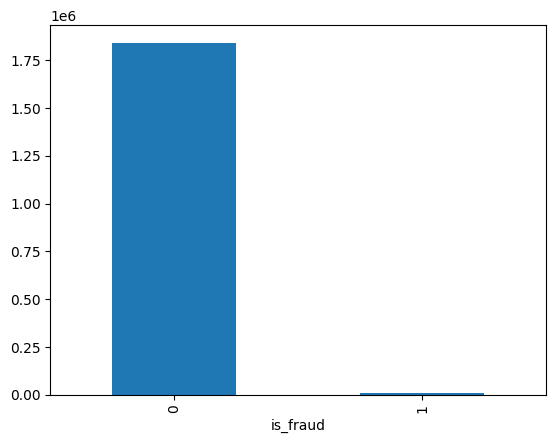

In [125]:
#Make a plot to see the difference
df.groupby("is_fraud").count()["cc_num"].plot(kind='bar')

In [126]:
#As we can see from the plot the number of not_fraud is way larger than fraud which will decrease the performance 
# of the model as there will be high chance to choose not_Fraud over fraud so we will resample it
fraud = df[df["is_fraud"] == 1]
not_fraud =  df[df["is_fraud"] == 0]
print(fraud.shape[0])
print(not_fraud.shape[0])


9651
1842743


In [127]:
#Handle Imbalanced Data
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
df_new = pd.concat([fraud, not_fraud],axis=0)
display(df_new)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99709,99709,2019-02-28 10:11:13,3533742182628021,fraud_Rodriguez Group,gas_transport,62.58,Robert,Haynes,M,857 Aaron Circles Suite 398,...,32.8357,-79.8217,20478,Materials engineer,1997-06-04,605e81d7ebaac9dbf4f257558fa6fb16,1330423873,32.418947,-78.873660,0
274694,274694,2020-10-01 08:30:47,213124978348176,fraud_Kerluke Inc,misc_net,273.25,Steven,Arnold,M,079 Chelsea Rest,...,42.3200,-78.0943,1766,Mechanical engineer,1962-06-04,2cc5a90386503e0b6394500e58b65ad7,1380616247,41.831789,-77.151160,0
807093,807093,2019-12-06 07:31:26,4328928491302401,fraud_Williamson LLC,misc_pos,2.74,Margaret,Ray,F,927 Cummings Manor Suite 318,...,42.9373,-87.9943,13973,Logistics and distribution manager,1981-05-06,2b0157caf3fcee18bc79d14a127d95db,1354779086,42.604173,-88.573357,0
861157,861157,2019-12-17 16:02:43,2242542703101233,"fraud_Towne, Greenholt and Koepp",shopping_net,161.28,Samuel,Jenkins,M,43235 Mckenzie Views Apt. 837,...,38.4921,-85.4524,564,Pensions consultant,1996-04-10,d8968ddbd84b59e0d9d0770dc8d3d7d6,1355760163,38.225422,-85.135045,0


<Axes: xlabel='is_fraud'>

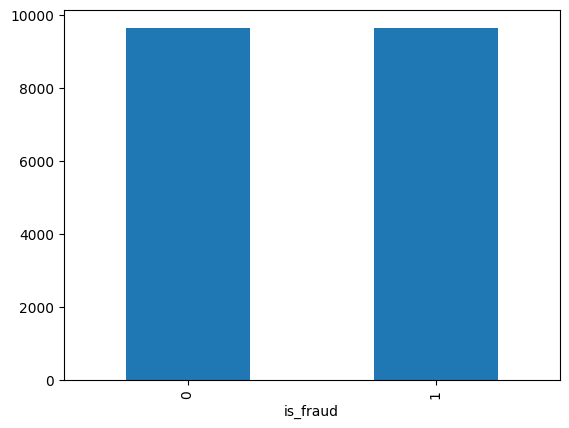

In [128]:
#Check with a plot that the new sample is balanced
df_new.groupby("is_fraud").count()['cc_num'].plot(kind = "bar")

In [129]:
# Drop unnecessary columns 
useless_cols = ['Unnamed: 0', 'merchant', 'cc_num', 'first', 'zip', 'last', 'trans_num', 'unix_time', 'street', 'merch_lat', 'gender', 'merch_long', 'job', 'trans_date_trans_time']
df_new.drop(columns=useless_cols, inplace=True)
df_new

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,32.8357,-79.8217,20478,1997-06-04,0
274694,misc_net,273.25,Belfast,NY,42.3200,-78.0943,1766,1962-06-04,0
807093,misc_pos,2.74,Greendale,WI,42.9373,-87.9943,13973,1981-05-06,0
861157,shopping_net,161.28,Westport,KY,38.4921,-85.4524,564,1996-04-10,0


In [130]:
# Drop Duplicates
df_new.duplicated().sum()
df_new.drop_duplicates(inplace=True)

In [131]:
#We will move forward with feature scaling, splitting the data into training and test sets, training  machine learning models, and evaluating their performance
X = df_new.drop('is_fraud', axis=1)
Y = df_new['is_fraud']

In [132]:
print(X)

             category     amt           city state      lat     long  \
2449      grocery_pos  281.06  Collettsville    NC  35.9946 -81.7266   
2472    gas_transport   11.52    San Antonio    TX  29.4400 -98.4590   
2523      grocery_pos  276.31    San Antonio    TX  29.4400 -98.4590   
2546    gas_transport    7.03  Collettsville    NC  35.9946 -81.7266   
2553      grocery_pos  275.73    San Antonio    TX  29.4400 -98.4590   
...               ...     ...            ...   ...      ...      ...   
99709   gas_transport   62.58   Johns Island    SC  32.8357 -79.8217   
274694       misc_net  273.25        Belfast    NY  42.3200 -78.0943   
807093       misc_pos    2.74      Greendale    WI  42.9373 -87.9943   
861157   shopping_net  161.28       Westport    KY  38.4921 -85.4524   
135673      kids_pets  163.68       Hinckley    OH  41.2419 -81.7453   

        city_pop         dob  
2449         885  1988-09-15  
2472     1595797  1960-10-28  
2523     1595797  1960-10-28  
2546       

In [133]:
print(Y)

2449      1
2472      1
2523      1
2546      1
2553      1
         ..
99709     0
274694    0
807093    0
861157    0
135673    0
Name: is_fraud, Length: 19300, dtype: int64


In [134]:
#Delete from X the columns with strings to use StandarScaler 
X=X.select_dtypes(include=['int64', 'float64'])

print(X)

           amt      lat     long  city_pop
2449    281.06  35.9946 -81.7266       885
2472     11.52  29.4400 -98.4590   1595797
2523    276.31  29.4400 -98.4590   1595797
2546      7.03  35.9946 -81.7266       885
2553    275.73  29.4400 -98.4590   1595797
...        ...      ...      ...       ...
99709    62.58  32.8357 -79.8217     20478
274694  273.25  42.3200 -78.0943      1766
807093    2.74  42.9373 -87.9943     13973
861157  161.28  38.4921 -85.4524       564
135673  163.68  41.2419 -81.7453      7646

[19300 rows x 4 columns]


In [135]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-0.04873722 -0.51063729  0.61161356 -0.29166984]
 [-0.76626146 -1.78918865 -0.57576845  4.99201078]
 [-0.06138187 -1.78918865 -0.57576845  4.99201078]
 ...
 [-0.78963411  0.84361751  0.1668385  -0.24831145]
 [-0.36759547 -0.02347072  0.34721946 -0.29273326]
 [-0.36120659  0.51290992  0.61028655 -0.26927176]]


In [136]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [137]:
#Linear Regression (Note: Linear Regression is not typically used for classification tasks)
LinearReg=LinearRegression()
LinearReg.fit(x_train,y_train)


LinearRegression()

In [138]:
# The coefficients
print ('Coefficients: ', LinearReg.coef_, LinearReg.intercept_)

Coefficients:  [ 0.30862137  0.00481288  0.00669455 -0.00201195] 0.5009747622595951


In [139]:
predictions=LinearReg.predict(x_test)
predictions

array([0.30015142, 0.27062094, 1.16691462, ..., 0.49986753, 0.30299352,
       0.27619871])

In [140]:
LinearRegression_R2=r2_score(y_test, predictions)
LinearRegression_MAE=mean_absolute_error(y_test, predictions)
LinearRegression_MSE=mean_squared_error(y_test, predictions)
print('Linear Regression MAE:',LinearRegression_MAE)
print('Linear Regression MSE:',LinearRegression_MSE)
print('Linear Regression R2:',LinearRegression_R2)

Linear Regression MAE: 0.3303742800486066
Linear Regression MSE: 0.15475128500321594
Linear Regression R2: 0.38097475151306537


In [141]:
regression_dict={'MAE':[LinearRegression_MAE], 'MSE':[LinearRegression_MSE],'R2':[LinearRegression_R2]}
regression_metrics=pd.DataFrame(regression_dict)
regression_metrics.index=['Linear Regression']
display(regression_metrics)

,MAE,MSE,R2
Linear Regression,0.330374,0.154751,0.380975


In [142]:
#KNN algorithm
k = 4
KNN = KNeighborsClassifier(n_neighbors = k)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [143]:
predictionsKNN=KNN.predict(x_test)
predictionsKNN

array([0, 0, 1, ..., 1, 0, 0])

In [144]:
KNN_Accuracy_Score = accuracy_score(y_test,predictionsKNN)
KNN_JaccardIndex = jaccard_score(y_test,predictionsKNN)
KNN_F1_Score = f1_score(y_test,predictionsKNN)
print('KNN Accuracy Score:', KNN_Accuracy_Score)
print('KNN Jaccard Index:',KNN_JaccardIndex)
print('KNN F1 Score:',KNN_F1_Score)

KNN Accuracy Score: 0.8650259067357513
KNN Jaccard Index: 0.7492781520692974
KNN F1 Score: 0.8566712517193947


In [145]:
KNN_dict={'Accuracy Score':[KNN_Accuracy_Score],'Jaccard Index':[KNN_JaccardIndex],'F1 Score':[KNN_F1_Score]}
KNN_metrics=pd.DataFrame(KNN_dict)
KNN_metrics.index=['KNN metrics']
display(KNN_metrics)

,Accuracy Score,Jaccard Index,F1 Score
KNN metrics,0.865026,0.749278,0.856671


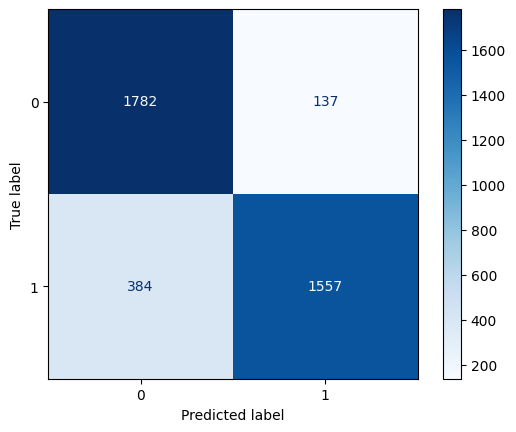

In [146]:
#Confusion Matrix
cmKNN = confusion_matrix(y_test,predictionsKNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cmKNN, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')

In [147]:
#Decision Tree algorithm
#Find the best max_depth
best_score = 0
best_max_depth = 0
max_depth_range = range(1, 21)
for depth in max_depth_range:
    # Create a DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=10)
    
    # Perform cross-validation and calculate the mean score
    scores = cross_val_score(clf, x_train, y_train, cv=5)
    mean_score = np.mean(scores)
    
    # Update the best score and best_max_depth if the current mean score is better
    if mean_score > best_score:
        best_score = mean_score
        best_max_depth = depth
print('The best max depth:', best_max_depth)

The best max depth: 6


In [148]:
# Train the final model 
Tree= DecisionTreeClassifier(criterion='entropy',max_depth=best_max_depth)
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [149]:
predictionsTree=Tree.predict(x_test)

In [150]:
Tree_Accuracy_Score = accuracy_score(y_test,predictionsTree)
Tree_JaccardIndex = jaccard_score(y_test,predictionsTree)
Tree_F1_Score = f1_score(y_test,predictionsTree) 
print('Tree Accuracy Score:',Tree_Accuracy_Score)
print('Tree Jaccard Index:', Tree_JaccardIndex)
print('Tree F1 Score:',Tree_F1_Score)

Tree Accuracy Score: 0.8841968911917099
Tree Jaccard Index: 0.7963553530751708
Tree F1 Score: 0.8866345422267309


In [151]:
Tree_dict={'Accuracy Score':[Tree_Accuracy_Score],'Jaccard Index':[Tree_JaccardIndex],'F1 Score':[Tree_F1_Score]}
Tree_metrics=pd.DataFrame(Tree_dict)
Tree_metrics.index=['Tree metrics']
display(Tree_metrics)

,Accuracy Score,Jaccard Index,F1 Score
Tree metrics,0.884197,0.796355,0.886635


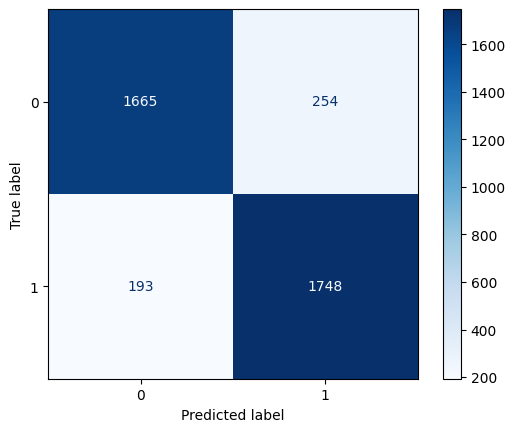

In [152]:
#Confusion Matrix
cmTree = confusion_matrix(y_test,predictionsTree)
disp = ConfusionMatrixDisplay(confusion_matrix=cmTree, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')

In [153]:
#Logistic Regression
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled, Y,test_size=0.2,random_state=1)

In [154]:
LR=LogisticRegression(C=0.01,solver='liblinear')
LR.fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [155]:
predictionsLR=LR.predict(X_test)
predict_proba=LR.predict_proba(X_test)

In [156]:
#LR metrics for Y_test and predictions LR
LR_Accuracy_Score = accuracy_score(Y_test,predictionsLR)
LR_JaccardIndex = jaccard_score(Y_test,predictionsLR)
LR_F1_Score = f1_score(Y_test,predictionsLR)
print('LR Accuracy_Score (predictionsLR)',LR_Accuracy_Score)
print('lR Jaccard Index (predictionsLR)',LR_JaccardIndex)
print('LR f1 score (predictions LR)',LR_F1_Score)

LR Accuracy_Score (predictionsLR) 0.8585492227979274
lR Jaccard Index (predictionsLR) 0.7316953316953317
LR f1 score (predictions LR) 0.8450624290578888


In [157]:
#LR metrics for Y_test and predictproba
LR_Log_Loss = log_loss(Y_test, predict_proba)
print('LR log loss (predict_proba)',LR_Log_Loss)

LR log loss (predict_proba) 0.4357710384220835


In [158]:
LR_dict={'Accuracy Score':[LR_Accuracy_Score],'Jaccard Index':[LR_JaccardIndex],'F1 Score':[LR_F1_Score],'Log Loss':[LR_Log_Loss]}
LR_metrics=pd.DataFrame(LR_dict)
LR_metrics.index=['Logistic Regression metrics']
display(LR_metrics)

,Accuracy Score,Jaccard Index,F1 Score,Log Loss
Logistic Regression metrics,0.858549,0.731695,0.845062,0.435771


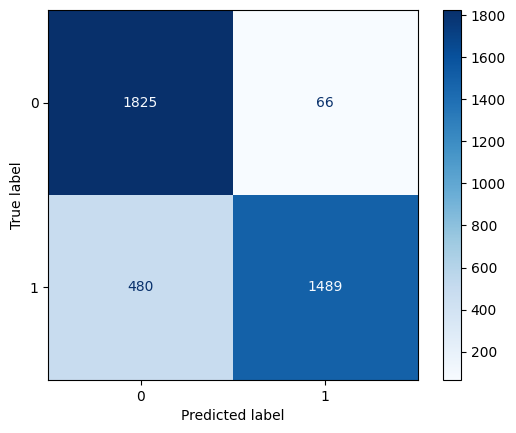

In [159]:
#Confusion Matrix
cmLR = confusion_matrix(Y_test,predictionsLR)
disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=np.unique(Y_test))
disp.plot(cmap='Blues')

In [160]:
#SVM algorithm
SVM=svm.SVC()
SVM.fit(x_train,y_train)


SVC()

In [161]:
predictionsSVM=SVM.predict(x_test)

In [162]:
SVM_Accuracy_Score = accuracy_score(y_test,predictionsSVM)
SVM_JaccardIndex = jaccard_score(y_test,predictionsSVM)
SVM_F1_Score = f1_score(y_test,predictionsSVM)
print('LR Accuracy_Score ',SVM_Accuracy_Score)
print('lR Jaccard Index ',SVM_JaccardIndex)
print('LR f1 score ',SVM_F1_Score)

LR Accuracy_Score  0.8626943005181347
lR Jaccard Index  0.7351324337831084
LR f1 score  0.8473502304147466


In [163]:
SVM_dict={'Accuracy Score':[SVM_Accuracy_Score],'Jaccard Index':[SVM_JaccardIndex],'F1 Score':[SVM_F1_Score]}
SVM_metrics=pd.DataFrame(SVM_dict)
SVM_metrics.index=['SVM metrics']
display(SVM_metrics)

,Accuracy Score,Jaccard Index,F1 Score
SVM metrics,0.862694,0.735132,0.84735


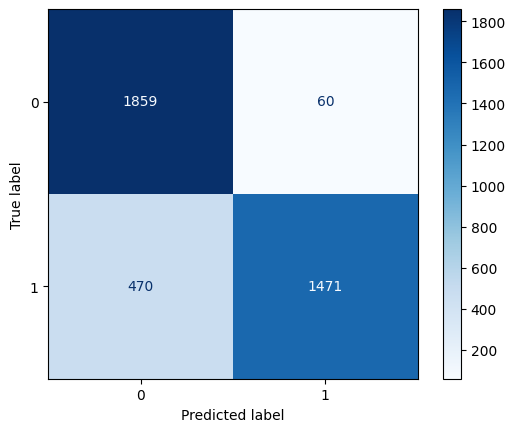

In [164]:
#Confusion Matrix
cmSVM= confusion_matrix(y_test,predictionsSVM)
disp = ConfusionMatrixDisplay(confusion_matrix=cmSVM, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')

In [165]:
dict={'Model':['KNN','Decision Tree','Logistic Regression','SVM'],'Accuracy':[KNN_Accuracy_Score,Tree_Accuracy_Score,LR_Accuracy_Score,SVM_Accuracy_Score],'Jaccard Index':[KNN_JaccardIndex,Tree_JaccardIndex,LR_JaccardIndex,SVM_JaccardIndex],'F1-Score':[KNN_F1_Score,Tree_F1_Score,LR_F1_Score,SVM_F1_Score],'LogLoss':['-','-',LR_Log_Loss,'-']}
Report=pd.DataFrame(dict)
display(Report)

,Model,Accuracy,Jaccard Index,F1-Score,LogLoss
0,KNN,0.865026,0.749278,0.856671,-
1,Decision Tree,0.884197,0.796355,0.886635,-
2,Logistic Regression,0.858549,0.731695,0.845062,0.435771
3,SVM,0.862694,0.735132,0.847350,-
